In [ ]:
#configuración en google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install geopandas
!pip install rioxarray
!pip install pysal
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.0 MB/s 
     |████████████████████████████████| 16.7 MB 356 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=cb4f724fe7962a048dd3d1aa05dd0abf39874fdf92a66ca6367f52a97669dad1
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple

In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # Graphics
from matplotlib import colors

import pysal as py #ESDA
import seaborn  # Graphics
import geopandas as gp  # Spatial data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles



from splot import esda as esdaplot

import statistics 
from statistics import mean

/usr/local/lib/python3.7/dist-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [ ]:
#Ingesta de datos
df=pd.read_csv('/content/gdrive/MyDrive/Proyecto integrador/Tasa_Colombia.csv', sep=",", encoding = 'utf8')
df=df.dropna()
df['dpto'] = np.where((df.mpio_ccdgo ==11001), 11 , df.dpto)
#data_types_dict = {'mpio_ccdgo': int,
#                   'year': int,
#                   'dpto': int} 
#df = df.astype(data_types_dict) 
#df = df.set_index(['mpio_ccdgo'])
df.head()

,year,mpio_ccdgo,municipio_hecho,departamento,cantidad,poblacion,tasa,dpto,departamento_nombre
0,2010.0,5001.0,Medellín (ct),Antioquia,1403.0,2185539.0,64.194691,5,Antioquia
1,2010.0,5002.0,Abejorral,Antioquia,4.0,21822.0,18.330126,5,Antioquia
2,2010.0,5030.0,Amagá,Antioquia,10.0,28132.0,35.546708,5,Antioquia
3,2010.0,5031.0,Amalfi,Antioquia,6.0,23986.0,25.014592,5,Antioquia
4,2010.0,5034.0,Andes,Antioquia,11.0,42152.0,26.096033,5,Antioquia


In [ ]:
df=df[df['year'] <2022]
df

,year,mpio_ccdgo,municipio_hecho,departamento,cantidad,poblacion,tasa,dpto,departamento_nombre
0,2010.0,5001.0,Medellín (ct),Antioquia,1403.0,2185539.0,64.194691,5,Antioquia
1,2010.0,5002.0,Abejorral,Antioquia,4.0,21822.0,18.330126,5,Antioquia
2,2010.0,5030.0,Amagá,Antioquia,10.0,28132.0,35.546708,5,Antioquia
3,2010.0,5031.0,Amalfi,Antioquia,6.0,23986.0,25.014592,5,Antioquia
4,2010.0,5034.0,Andes,Antioquia,11.0,42152.0,26.096033,5,Antioquia
...,...,...,...,...,...,...,...,...,...
9795,2021.0,95200.0,Miraflores,Guaviare,1.0,7194.0,13.900473,95,Guaviare
9796,2021.0,97001.0,Mitú (ct),Vaupés,1.0,34307.0,2.914857,97,Vaupés
9797,2021.0,99001.0,Puerto carreño (ct),Vichada,6.0,20578.0,29.157353,99,Vichada
9798,2021.0,99524.0,La primavera,Vichada,1.0,9743.0,10.263779,99,Vichada


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 9800 non-null   float64
 1   mpio_ccdgo           9800 non-null   float64
 2   municipio_hecho      9800 non-null   object 
 3   departamento         9800 non-null   object 
 4   cantidad             9800 non-null   float64
 5   poblacion            9800 non-null   float64
 6   tasa                 9800 non-null   float64
 7   dpto                 9800 non-null   int64  
 8   departamento_nombre  9800 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 765.6+ KB


In [ ]:
df.count()

year                   9800
mpio_ccdgo             9800
municipio_hecho        9800
departamento           9800
cantidad               9800
poblacion              9800
tasa                   9800
dpto                   9800
departamento_nombre    9800
dtype: int64

In [ ]:
total_Colombia = df.groupby('year').agg(
         cantidad= ('cantidad',sum),
         poblacion= ('poblacion', sum)
)
total_Colombia

,cantidad,poblacion
year,,
2010.0,15013.0,42040902.0
2011.0,15803.0,42330512.0
2012.0,16033.0,42976822.0
2013.0,14971.0,43657464.0
2014.0,12958.0,43792583.0
2015.0,12460.0,44301028.0
2016.0,12164.0,44751675.0
2017.0,12079.0,45236409.0
2018.0,12667.0,45950723.0


In [ ]:
tasa = (total_Colombia['cantidad'] / total_Colombia['poblacion'])*100000
total_Colombia['ano'] = df['year'].unique()
total_Colombia['tasa'] = tasa
total_Colombia

,cantidad,poblacion,ano,tasa
year,,,,
2010.0,15013.0,42040902.0,2010.0,35.710461
2011.0,15803.0,42330512.0,2011.0,37.332409
2012.0,16033.0,42976822.0,2012.0,37.306155
2013.0,14971.0,43657464.0,2013.0,34.291960
2014.0,12958.0,43792583.0,2014.0,29.589486
2015.0,12460.0,44301028.0,2015.0,28.125758
2016.0,12164.0,44751675.0,2016.0,27.181106
2017.0,12079.0,45236409.0,2017.0,26.701943
2018.0,12667.0,45950723.0,2018.0,27.566487


<BarContainer object of 12 artists>

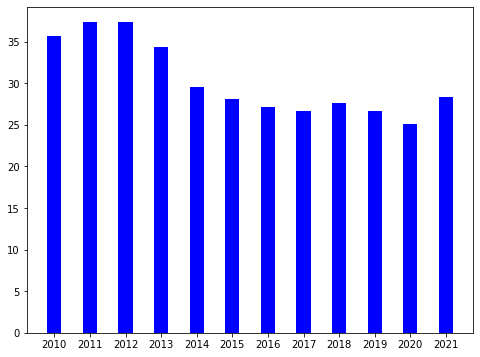

In [ ]:
#Análisis gráfico de labels
fig = plt.figure(figsize=(8,6))
x=total_Colombia['ano']
y= total_Colombia['tasa']
plt.xticks(x)
plt.bar(x, y, color ='blue',
        width = 0.4)

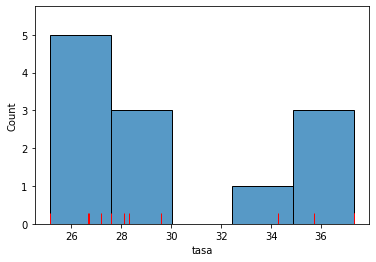

In [ ]:
# Plot histogram
ax = seaborn.histplot(y, bins=5)
# Add rug on horizontal axis
seaborn.rugplot(y, height=0.05, color="red", ax=ax)

# Análisis exploratorio por departamento 

In [ ]:
#Importar geometría - mapa de Colombia
shape_Col = gp.read_file('/content/gdrive/MyDrive/Proyecto integrador/Shape_departamento/depto.shp')
data_types_dict = {"DPTO": int} 
shape_Col = shape_Col .astype(data_types_dict) 
shape_Col = shape_Col.set_index(['DPTO'])
shape_Col.head()

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
DPTO,,,,,
5,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((754872.146 1445316.567, 755882.980 1..."
8,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((913511.163 1637374.172, 912870.293 1..."
11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((1006435.805 1021680.392, 1006048.264..."
13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((881889.901 1644370.282, 882454.535 1..."
15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((1206427.930 1268967.315, 1207191.680..."


In [ ]:
shape_Col.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 5 to 88
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE_DPT  33 non-null     object  
 1   AREA        33 non-null     float64 
 2   PERIMETER   33 non-null     float64 
 3   HECTARES    33 non-null     float64 
 4   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.5+ KB


In [ ]:
## tasa media por departamento para el período de tiempo analizado
valor_medio = df.groupby('dpto').agg(
         cantidad= ('cantidad', sum),
         poblacion =  ('poblacion', sum),
)

valor_medio.head()

,cantidad,poblacion
dpto,,
5,27937.0,73903302.0
8,6636.0,28608200.0
11,14862.0,88422089.0
13,4711.0,22635754.0
15,1216.0,9546211.0


In [ ]:
tasa_media = (valor_medio['cantidad']/valor_medio['poblacion'])*100000
valor_medio['tasa_media'] = tasa_media
valor_medio.head()

,cantidad,poblacion,tasa_media
dpto,,,
5,27937.0,73903302.0,37.802100
8,6636.0,28608200.0,23.196147
11,14862.0,88422089.0,16.808017
13,4711.0,22635754.0,20.812207
15,1216.0,9546211.0,12.738038


In [ ]:
valor_medio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 5 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cantidad    33 non-null     float64
 1   poblacion   33 non-null     float64
 2   tasa_media  33 non-null     float64
dtypes: float64(3)
memory usage: 1.0 KB


In [ ]:
db = gp.GeoDataFrame(shape_Col.join(valor_medio[["tasa_media"]]), crs=shape_Col.crs).to_crs(epsg=3857)
        
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 5 to 88
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE_DPT  33 non-null     object  
 1   AREA        33 non-null     float64 
 2   PERIMETER   33 non-null     float64 
 3   HECTARES    33 non-null     float64 
 4   geometry    33 non-null     geometry
 5   tasa_media  33 non-null     float64 
dtypes: float64(4), geometry(1), object(1)
memory usage: 2.9+ KB


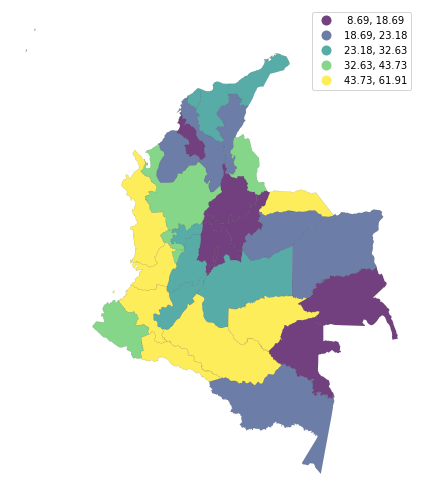

In [ ]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
db.plot(
    column="tasa_media",
    cmap='viridis',
    scheme="quantiles",
    k=5,
    edgecolor="black",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=1),
    ax=ax
)
ax.set_axis_off()

In [ ]:
# Matriz de pesos espaciales W
w = weights.KNN.from_dataframe(db, k=4)
# Estandarización
w.transform = "R"

In [ ]:
# Retraso espacial 
db["Tasa_lag"] = weights.spatial_lag.lag_spatial(
    w, db["tasa_media"]
)

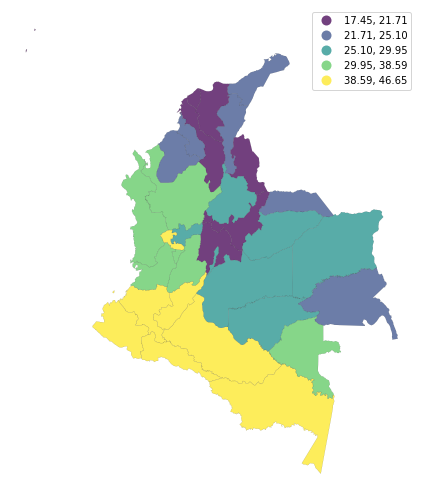

In [ ]:
# Gráfica lag_espacial
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
db.plot(
    column="Tasa_lag",
    cmap='viridis',
    scheme="quantiles",
    k=5,
    edgecolor="black",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=1),
    ax=ax
)
ax.set_axis_off()

In [ ]:
#Tasa estandarizada
db["Tasa_std"] = (db["tasa_media"] - db["tasa_media"].mean()) / db["tasa_media"].std()
db["Tasa_lag_std"] = weights.spatial_lag.lag_spatial(
    w, db["Tasa_std"]
)

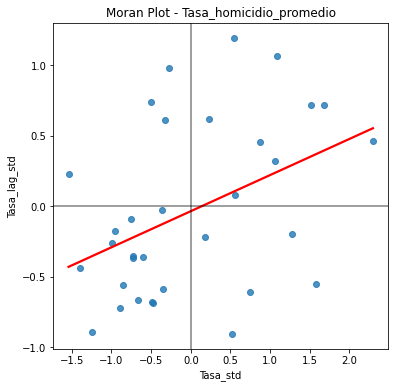

In [ ]:
#Grafico Indice de Moran I 
f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(
    x="Tasa_std",
    y="Tasa_lag_std",
    ci=None,
    data=db,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - Tasa_homicidio_promedio")
plt.show()

In [ ]:
# Índice de Moran 
w.transform = "R"
moran = esda.moran.Moran(db["Tasa_std"], w)
moran.I

0.2564248801332853

In [ ]:
moran.p_sim

0.009

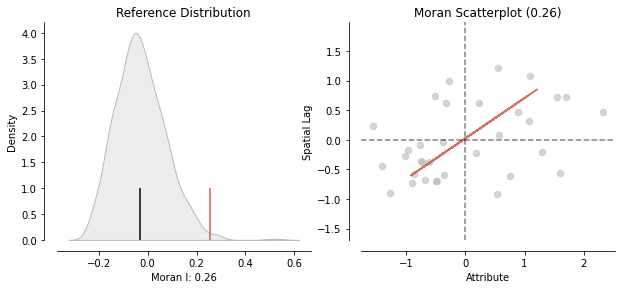

In [ ]:
from splot.esda import plot_moran
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

Indíce local de autocorrelación espacial

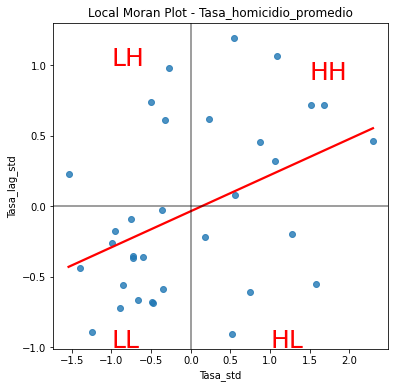

In [ ]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
     x="Tasa_std",
    y="Tasa_lag_std",
    ci=None,
    data=db,
    line_kws={"color": "r"},   
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Local Moran Plot - Tasa_homicidio_promedio")

# Add text labels for each quadrant
plt.text(1.5, 0.9, "HH", fontsize=25, c="r")
plt.text(1,-1, "HL", fontsize=25, c="r")
plt.text(-1, 1, "LH", fontsize=25, c="r")
plt.text(-1, -1, "LL", fontsize=25, c="r")
# Display
plt.show()

In [ ]:
# índice local del Moran 
lisa = esda.Moran_Local(db["Tasa_std"], w)

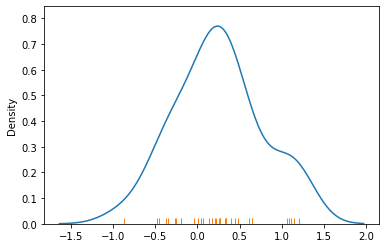

In [ ]:
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

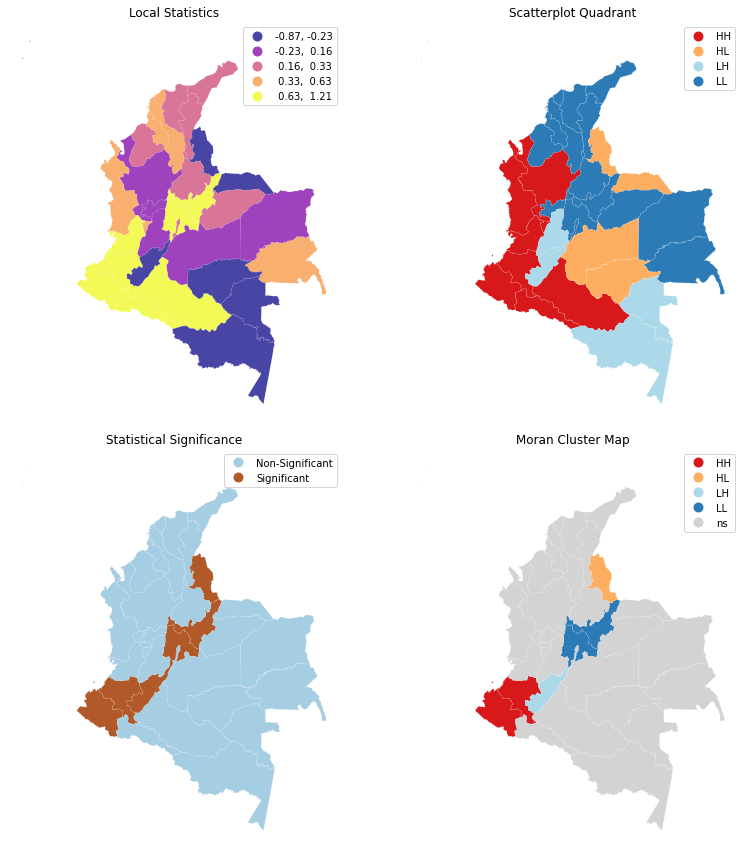

In [ ]:
#Análisis gráfico de LISA 
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
db.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, db, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, db, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()

In [ ]:
# Porcentaje de datos significativos 
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

18.181818181818183

In [ ]:
# Assign pseudo P-values to `db`
db["p-sim"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
db["sig"] = sig
db["Departamento"] = db["NOMBRE_DPT"]
# Print top of the table to inspect
db[["NOMBRE_DPT","sig", "p-sim"]].sort_values('p-sim').head(10)

,NOMBRE_DPT,sig,p-sim
DPTO,,,
52,NARIÑO,1,0.004
19,CAUCA,1,0.008
15,BOYACA,1,0.015
54,NORTE DE SANTANDER,1,0.016
41,HUILA,1,0.025
25,CUNDINAMARCA,1,0.048
86,PUTUMAYO,0,0.052
18,CAQUETA,0,0.054
47,MAGDALENA,0,0.063


In [ ]:
db[["NOMBRE_DPT","sig", "p-sim"]].sort_values('p-sim')

,NOMBRE_DPT,sig,p-sim
DPTO,,,
52,NARIÑO,1,0.004
19,CAUCA,1,0.008
15,BOYACA,1,0.015
54,NORTE DE SANTANDER,1,0.016
41,HUILA,1,0.025
25,CUNDINAMARCA,1,0.048
86,PUTUMAYO,0,0.052
18,CAQUETA,0,0.054
47,MAGDALENA,0,0.063


In [ ]:
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
db["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=db.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
db[["NOMBRE_DPT","labels"]].head()

,NOMBRE_DPT,labels
DPTO,,
5,ANTIOQUIA,Non-Significant
8,ATLANTICO,Non-Significant
11,SANTAFE DE BOGOTA D.C,Non-Significant
13,BOLIVAR,Non-Significant
15,BOYACA,LL


In [ ]:
db["labels"].value_counts()

Non-Significant    27
LL                  2
HH                  2
LH                  1
HL                  1
Name: labels, dtype: int64

# Análisis por municipio 

In [ ]:
#Importar geometría - mapa de Colombia
shape_Col = gp.read_file('/content/gdrive/MyDrive/Proyecto integrador/Municipios_Colombia/MGN_MPIO_POLITICO.shp')
data_types_dict = {"MPIO_CDPMP": int,
                   "DPTO_CCDGO": int} 
shape_Col = shape_Col .astype(data_types_dict) 
shape_Col = shape_Col.set_index(['MPIO_CDPMP'])
shape_Col.head()

,DPTO_CCDGO,MPIO_CCDGO,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
MPIO_CDPMP,,,,,,,,,,,,
5001,5,001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
5002,5,002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
5004,5,004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
5021,5,021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
5030,5,030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


In [ ]:
shape_Col.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1121 entries, 5001 to 99773
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  1121 non-null   int64   
 1   MPIO_CCDGO  1121 non-null   object  
 2   DPTO_CNMBR  1121 non-null   object  
 3   MPIO_CNMBR  1121 non-null   object  
 4   MPIO_CRSLC  1121 non-null   object  
 5   MPIO_NAREA  1121 non-null   float64 
 6   MPIO_CSMBL  1121 non-null   object  
 7   MPIO_VGNC   1121 non-null   int64   
 8   MPIO_TIPO   1121 non-null   object  
 9   Shape_Leng  1121 non-null   float64 
 10  Shape_Area  1121 non-null   float64 
 11  geometry    1121 non-null   geometry
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 113.9+ KB


In [ ]:
## tasa media por municipio para el período de tiempo analizado
valor_medio = df.groupby('mpio_ccdgo').agg(
         cantidad= ('cantidad', sum),
         poblacion =  ('poblacion', sum),
)

valor_medio.head()

,cantidad,poblacion
mpio_ccdgo,,
5001.0,9338.0,28274552.0
5002.0,55.0,250123.0
5004.0,1.0,2652.0
5021.0,6.0,23270.0
5030.0,178.0,354884.0


In [ ]:
tasa_media = (valor_medio['cantidad']/valor_medio['poblacion'])*100000
valor_medio['tasa_media'] = tasa_media
valor_medio.head()

,cantidad,poblacion,tasa_media
mpio_ccdgo,,,
5001.0,9338.0,28274552.0,33.026164
5002.0,55.0,250123.0,21.989181
5004.0,1.0,2652.0,37.707391
5021.0,6.0,23270.0,25.784272
5030.0,178.0,354884.0,50.157234


In [ ]:
valor_medio.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1079 entries, 5001.0 to 99773.0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cantidad    1079 non-null   float64
 1   poblacion   1079 non-null   float64
 2   tasa_media  1079 non-null   float64
dtypes: float64(3)
memory usage: 33.7 KB


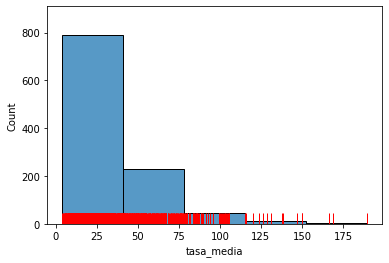

In [ ]:
# Plot histogram
ax = seaborn.histplot(valor_medio["tasa_media"], bins=5)
# Add rug on horizontal axis
seaborn.rugplot(valor_medio["tasa_media"], height=0.05, color="red", ax=ax);

In [ ]:
dm = gp.GeoDataFrame(shape_Col.join(valor_medio[["tasa_media"]]), crs=shape_Col.crs).to_crs(epsg=3857)
dm['tasa_media'] = dm['tasa_media'].fillna(0)       
dm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1121 entries, 5001 to 99773
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  1121 non-null   int64   
 1   MPIO_CCDGO  1121 non-null   object  
 2   DPTO_CNMBR  1121 non-null   object  
 3   MPIO_CNMBR  1121 non-null   object  
 4   MPIO_CRSLC  1121 non-null   object  
 5   MPIO_NAREA  1121 non-null   float64 
 6   MPIO_CSMBL  1121 non-null   object  
 7   MPIO_VGNC   1121 non-null   int64   
 8   MPIO_TIPO   1121 non-null   object  
 9   Shape_Leng  1121 non-null   float64 
 10  Shape_Area  1121 non-null   float64 
 11  geometry    1121 non-null   geometry
 12  tasa_media  1121 non-null   float64 
dtypes: float64(4), geometry(1), int64(2), object(6)
memory usage: 154.9+ KB


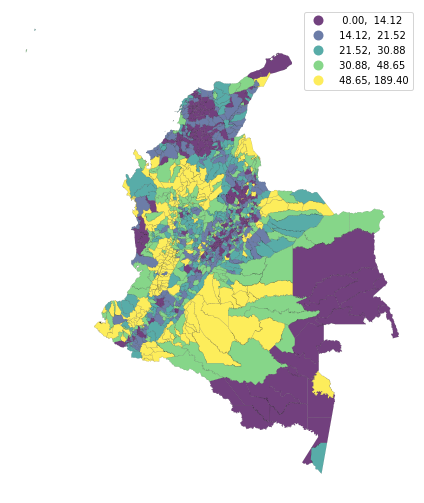

In [ ]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
dm.plot(
    column="tasa_media",
    cmap='viridis',
    scheme="quantiles",
    k=5,
    edgecolor="black",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=1),
    ax=ax
)
ax.set_axis_off()

In [ ]:
# Matriz de pesos espaciales W
w = weights.KNN.from_dataframe(dm, k=8)
# Estandarización
w.transform = "R"

In [ ]:
# Retraso espacial 
dm["Tasa_lag"] = weights.spatial_lag.lag_spatial(
    w, dm["tasa_media"]
)

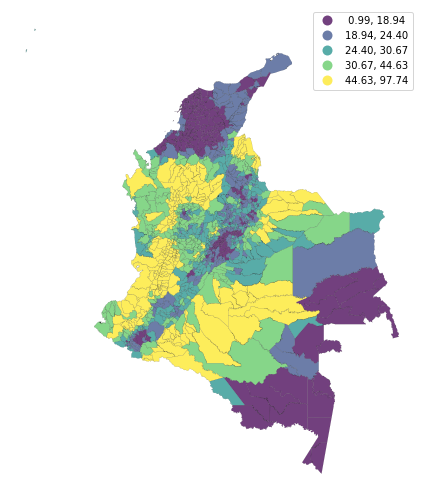

In [ ]:
# Gráfica lag_espacial
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
dm.plot(
    column="Tasa_lag",
    cmap='viridis',
    scheme="quantiles",
    k=5,
    edgecolor="black",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=1),
    ax=ax
)
ax.set_axis_off()

In [ ]:
#Tasa estandarizada
dm["Tasa_std"] = (dm["tasa_media"] - dm["tasa_media"].mean()) / dm["tasa_media"].std()
dm["Tasa_lag_std"] = weights.spatial_lag.lag_spatial(
    w, dm["Tasa_std"]
)

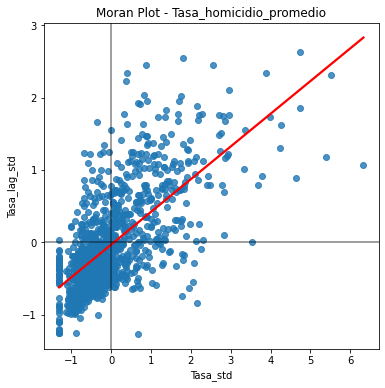

In [ ]:
#Grafico Indice de Moran I 
f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(
    x="Tasa_std",
    y="Tasa_lag_std",
    ci=None,
    data=dm,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - Tasa_homicidio_promedio")
plt.show()

In [ ]:
# Índice de Moran 
w.transform = "R"
moran = esda.moran.Moran(dm["Tasa_std"], w)
moran.I

0.45204642479082824

In [ ]:
moran.p_sim

0.001

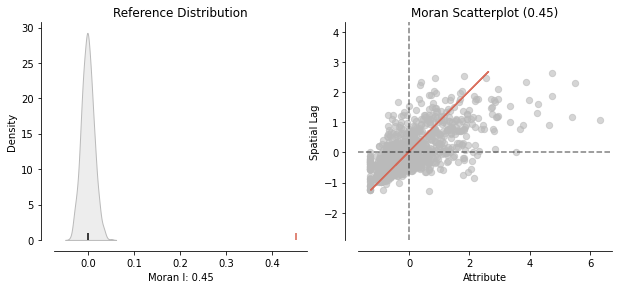

In [ ]:
from splot.esda import plot_moran
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

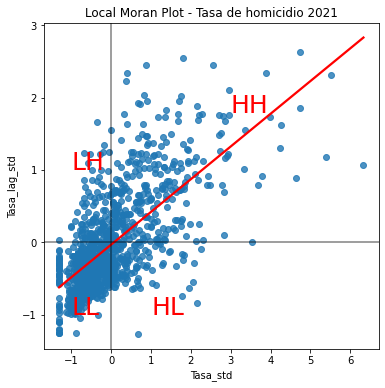

In [ ]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
     x="Tasa_std",
    y="Tasa_lag_std",
    ci=None,
    data=dm,
    line_kws={"color": "r"},   
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Local Moran Plot - Tasa de homicidio 2021")

# Add text labels for each quadrant
plt.text(3, 1.8, "HH", fontsize=25, c="r")
plt.text(1,-1, "HL", fontsize=25, c="r")
plt.text(-1, 1, "LH", fontsize=25, c="r")
plt.text(-1, -1, "LL", fontsize=25, c="r")
# Display
plt.show()

In [ ]:
# índice local del Moran 
lisa = esda.Moran_Local(dm["Tasa_std"], w)

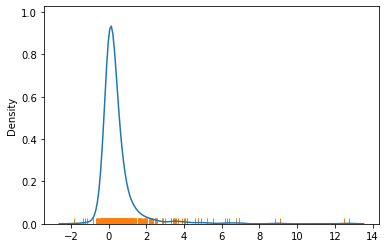

In [ ]:
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

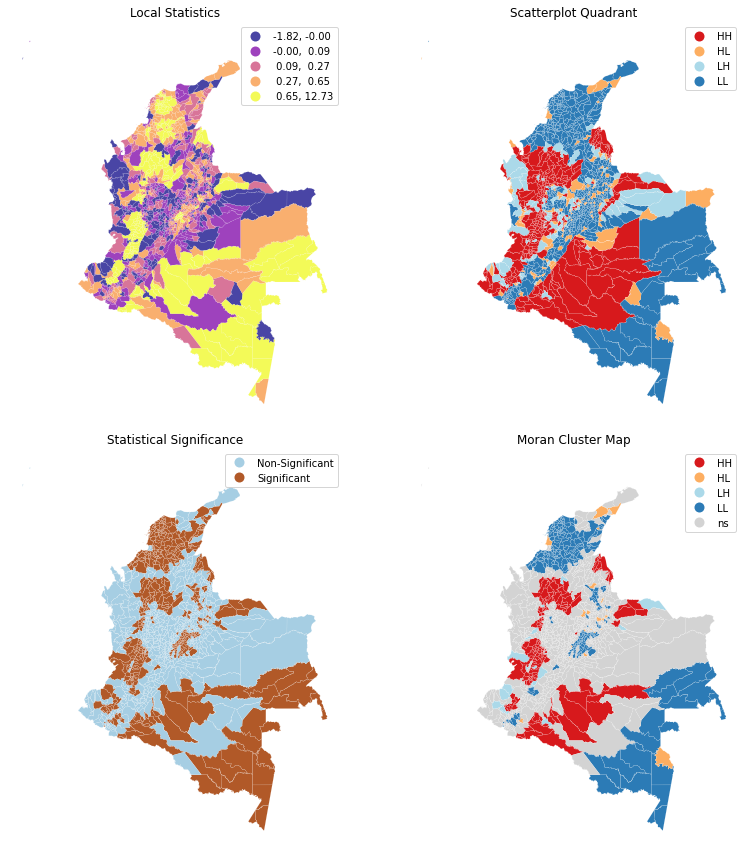

In [ ]:
#Análisis gráfico de LISA 
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
dm.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, dm, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=dm.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
dm.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, dm, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()

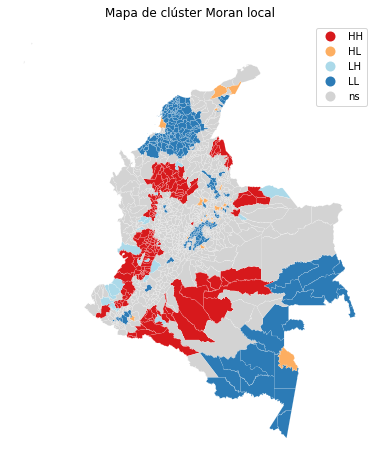

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
#Análisis gráfico de LISA 
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(8, 8))

# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, dm, p=0.05, ax=ax)
ax.set_title("Mapa de clúster Moran local")

plt.show()
plt.savefig("Moran_cluster.png")
plt.download("Moran_cluster.png")

In [ ]:
# Porcentaje de datos significativos 
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

41.570026761819804

In [ ]:
# Assign pseudo P-values to `db`
dm["p-sim"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
dm["sig"] = sig
dm["Municipio"] = dm["MPIO_CNMBR"]
# Print top of the table to inspect
dm[["MPIO_CNMBR","sig", "p-sim"]].sort_values('p-sim').head(10)

,MPIO_CNMBR,sig,p-sim
MPIO_CDPMP,,,
25817,TOCANCIPÁ,1,0.001
8560,PONEDERA,1,0.001
8606,REPELÓN,1,0.001
8634,SABANAGRANDE,1,0.001
8638,SABANALARGA,1,0.001
8675,SANTA LUCÍA,1,0.001
8685,SANTO TOMÁS,1,0.001
8770,SUAN,1,0.001
8849,USIACURÍ,1,0.001


In [ ]:
dm[["MPIO_CNMBR","sig", "p-sim"]].sort_values('p-sim').tail()

,MPIO_CNMBR,sig,p-sim
MPIO_CDPMP,,,
17013,AGUADAS,0,0.494
5002,ABEJORRAL,0,0.495
27450,MEDIO SAN JUAN,0,0.496
73275,FLANDES,0,0.498
19807,TIMBÍO,0,0.500


In [ ]:
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
dm["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=dm.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
dm[["MPIO_CNMBR","labels"]].head()

,MPIO_CNMBR,labels
MPIO_CDPMP,,
5001,MEDELLÍN,Non-Significant
5002,ABEJORRAL,Non-Significant
5004,ABRIAQUÍ,Non-Significant
5021,ALEJANDRÍA,Non-Significant
5030,AMAGÁ,Non-Significant


In [ ]:
dm["labels"].value_counts()

Non-Significant    655
LL                 267
HH                 155
HL                  24
LH                  20
Name: labels, dtype: int64

# Serie de tiempo  I de Moran global por departamento 

In [ ]:
#Ingesta de datos
df=pd.read_csv('/content/gdrive/MyDrive/Proyecto integrador/Tasa_Colombia.csv', sep=",", encoding = 'utf8')
df=df.dropna()
df['dpto'] = np.where((df.mpio_ccdgo ==11001), 11 , df.dpto)
df=df[df['dpto'] !=88] 
df=df[df['year'] <2022]
data_types_dict = {'mpio_ccdgo': int,
                   'year': int,
                   'dpto': int} 
df = df.astype(data_types_dict) 
df = df.set_index(['mpio_ccdgo'])
df.head()

,year,municipio_hecho,departamento,cantidad,poblacion,tasa,dpto,departamento_nombre
mpio_ccdgo,,,,,,,,
5001,2010,Medellín (ct),Antioquia,1403.0,2185539.0,64.194691,5,Antioquia
5002,2010,Abejorral,Antioquia,4.0,21822.0,18.330126,5,Antioquia
5030,2010,Amagá,Antioquia,10.0,28132.0,35.546708,5,Antioquia
5031,2010,Amalfi,Antioquia,6.0,23986.0,25.014592,5,Antioquia
5034,2010,Andes,Antioquia,11.0,42152.0,26.096033,5,Antioquia


In [ ]:
#Importar geometría - mapa de Colombia
shape_Col = gp.read_file('/content/gdrive/MyDrive/Proyecto integrador/Municipios_Colombia/MGN_MPIO_POLITICO.shp')
data_types_dict = {"MPIO_CDPMP": int,
                   "DPTO_CCDGO": int} 
shape_Col = shape_Col .astype(data_types_dict) 
shape_Col = shape_Col.set_index(['MPIO_CDPMP'])
shape_Col['DPTO_CCDGO'] = np.where((shape_Col.DPTO_CCDGO ==11), 25 , shape_Col.DPTO_CCDGO)
#shape_Col=shape_Col[shape_Col["DPTO_CCDGO"] !=11]
shape_Col=shape_Col[shape_Col["DPTO_CCDGO"] !=88]
shape_Col.head()

,DPTO_CCDGO,MPIO_CCDGO,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
MPIO_CDPMP,,,,,,,,,,,,
5001,5,001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
5002,5,002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
5004,5,004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
5021,5,021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
5030,5,030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


In [ ]:
year= list(range(2010, 2022))
departamento = list(shape_Col["DPTO_CCDGO"].unique())
im = pd.DataFrame(columns=['cod_dpto','year','moran_value','pvalue'])

for i in  range(0,12):
  for j in range(0,31):

   dff= df[df['dpto'] == departamento[j]]
   dff2=dff[dff['year'] == year[i]]
   shape_Colf = shape_Col[shape_Col['DPTO_CCDGO'] == departamento[j]]
   dm = gp.GeoDataFrame(shape_Colf.join(dff2[["tasa"]]), crs=shape_Colf.crs).to_crs(epsg=3857)
   dm['tasa'] = dm['tasa'].fillna(0) 
  
   if departamento[j]== 95 or departamento[j]== 99:
    #Matriz de pesos espaciales
     w = weights.KNN.from_dataframe(dm, k=2)
   #Estandarizacion 
     w.transform = "R"
   else: 
     #Matriz de pesos espaciales
     w = weights.KNN.from_dataframe(dm, k=4)
   #Estandarizacion 
     w.transform = "R"

    #Estandarización de tasas 
   dm["Tasa_std"] = (dm["tasa"] - dm["tasa"].mean()) / dm["tasa"].std()
   dm["Tasa_lag_std"] = weights.spatial_lag.lag_spatial(
   w, dm["Tasa_std"])

    #Indice de Moran I 
   w.transform = "R"
   moran = esda.moran.Moran(dm["Tasa_std"], w)
  
   tm = pd.DataFrame()
  
   tm['cod_dpto']= [departamento[j]]
   tm['year']= year[i]
   tm['moran_value']= moran.I
   tm['pvalue']= moran.p_sim

   im= im.append(tm,
             ignore_index=True)
   
   im['moran_value'] = im['moran_value'].fillna(0) 

print(im)



    cod_dpto  year  moran_value  pvalue
0          5  2010     0.258407   0.001
1          8  2010     0.435119   0.002
2         25  2010     0.054754   0.147
3         13  2010     0.382981   0.001
4         15  2010     0.035134   0.210
..       ...   ...          ...     ...
367       91  2021    -0.050000   0.167
368       94  2021    -0.214286   0.122
369       95  2021    -0.219397   0.220
370       97  2021    -0.250000   0.167
371       99  2021     0.040199   0.083

[372 rows x 4 columns]


In [ ]:
shape_Col["DPTO_CCDGO"].unique().shape

(31,)

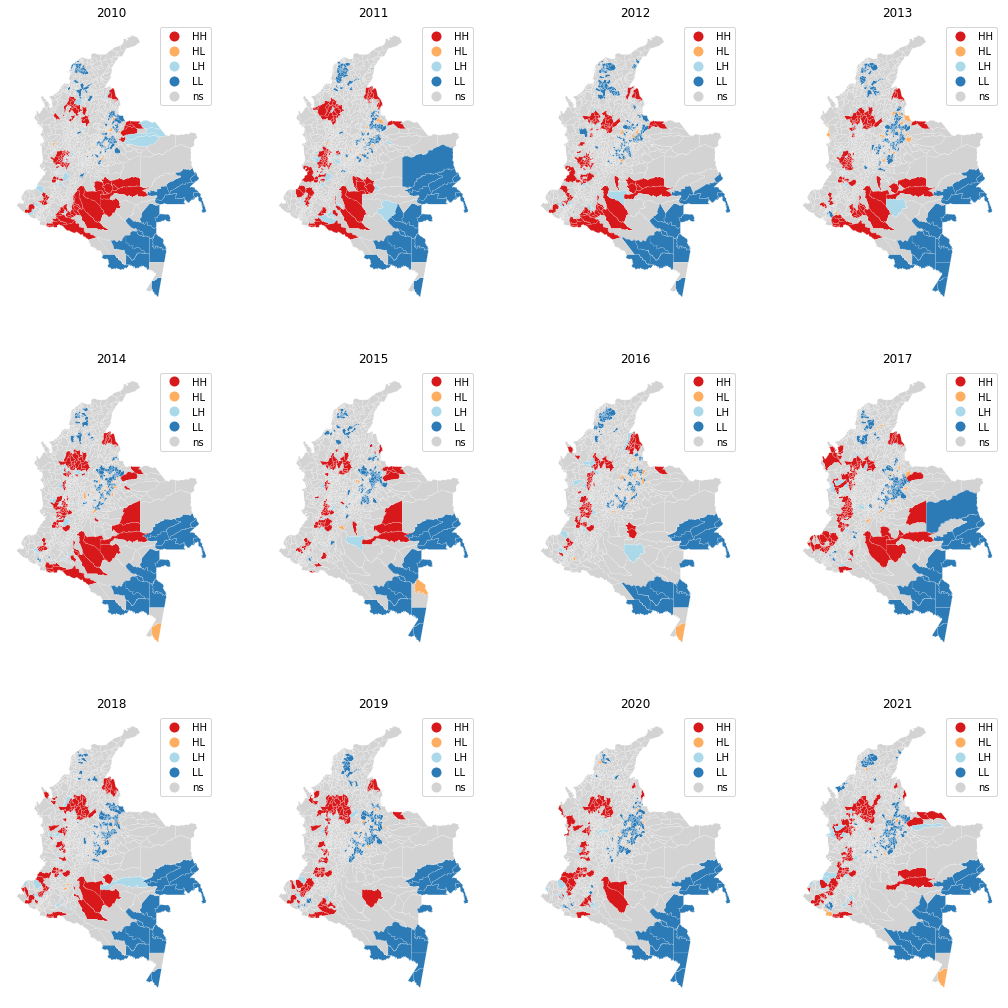

In [ ]:
year= list(range(2010, 2022))

f, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 18))
axs=axs.flatten()

for i in  range(0,12):

   dff=df[df['year'] == year[i]]
   dm = gp.GeoDataFrame(shape_Col.join(dff[["tasa"]]), crs=shape_Colf.crs).to_crs(epsg=3857)
   dm['tasa'] = dm['tasa'].fillna(0) 

   w = weights.KNN.from_dataframe(dm, k=4)
   w.transform = "R"

   dm["Tasa_std"] = (dm["tasa"] - dm["tasa"].mean()) / dm["tasa"].std()
   dm["Tasa_lag_std"] = weights.spatial_lag.lag_spatial(
   w, dm["Tasa_std"])

   # índice local del Moran 
   lisa = esda.Moran_Local(dm["Tasa_std"], w)  

  #Análisis gráfico de LISA 
  # Set up figure and axes

   # Plot Quandrant colors In this case, we use a 5% significance
   # level to select polygons as part of statistically significant
   # clusters
   ax = axs[i]
   esdaplot.lisa_cluster(lisa, dm, p=0.05, ax=ax)
   ax.set_title(year[i])
   ax.set_axis_off()

plt.show()

  


In [ ]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_dpto     372 non-null    object 
 1   year         372 non-null    object 
 2   moran_value  372 non-null    float64
 3   pvalue       372 non-null    float64
dtypes: float64(2), object(2)
memory usage: 11.8+ KB


In [ ]:
# Siganificacia estadística 
im[im["pvalue"]>0.05]

,cod_dpto,year,moran_value,pvalue
2,25,2010,0.054754,0.147
4,15,2010,0.035134,0.210
6,18,2010,-0.215346,0.121
7,19,2010,0.046157,0.213
8,20,2010,0.142190,0.088
...,...,...,...,...
367,91,2021,-0.050000,0.167
368,94,2021,-0.214286,0.122
369,95,2021,-0.219397,0.220
370,97,2021,-0.250000,0.167


In [ ]:
# Reemplazamos valores no significativos por cero 

im['moran_value'] = np.where((im.pvalue >0.05), 0 , im.moran_value)
im

,cod_dpto,year,moran_value,pvalue
0,5,2010,0.258407,0.001
1,8,2010,0.435119,0.002
2,25,2010,0.000000,0.147
3,13,2010,0.382981,0.001
4,15,2010,0.000000,0.210
...,...,...,...,...
367,91,2021,0.000000,0.167
368,94,2021,0.000000,0.122
369,95,2021,0.000000,0.220
370,97,2021,0.000000,0.167


# K-means 

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
x= im["moran_value"]
x=np.array(x).reshape(-1,1)

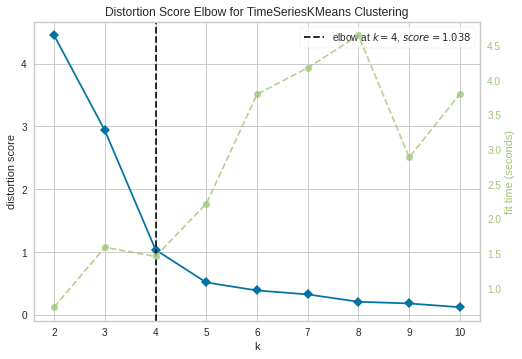

In [ ]:
# Determinamos k óptimo

modelo_1 = TimeSeriesKMeans(n_clusters=4, metric="dtw")
elb_visualizer = KElbowVisualizer(modelo_1, k=(2,11))
elb_visualizer.fit(x)
elb_visualizer.show()

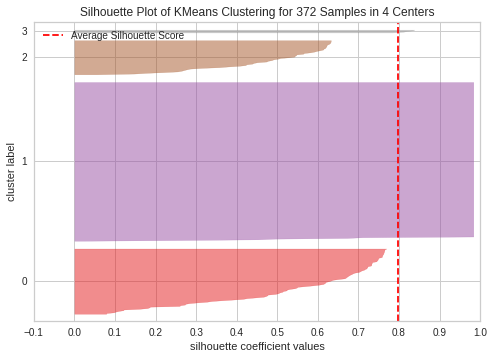

In [ ]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(x)    
sil_visualizer.show()

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.2 MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from matplotlib import pyplot

In [ ]:
# reshape from long to wide in pandas python
name_column = df
ts=im.pivot(index='year', columns='cod_dpto', values='moran_value')
ts=ts.reset_index()
ts

cod_dpto,year,5,8,13,15,17,18,19,20,23,...,73,76,81,85,86,91,94,95,97,99
0,2010,0.258407,0.435119,0.382981,0.000000,0.424969,0.000000,0.000000,0.000000,0.374222,...,0.157001,0.217004,0.000000,0.0,0.299958,0.000000,0.0,-0.756582,0.0,0.000000
1,2011,0.312405,0.324609,0.361203,0.000000,0.659189,0.000000,0.152508,0.000000,0.458699,...,0.000000,0.230876,0.000000,0.0,0.391457,0.146878,0.0,0.000000,0.0,0.000000
2,2012,0.402580,0.347237,0.323548,0.163722,0.279984,0.000000,0.210578,0.000000,0.200298,...,0.000000,0.000000,0.133318,0.0,0.546270,0.000000,0.0,0.000000,0.0,-0.543476
3,2013,0.388733,0.000000,0.525497,0.162728,0.000000,0.000000,0.000000,0.000000,0.204846,...,0.000000,0.000000,0.000000,0.0,0.415554,0.000000,0.0,-0.708462,0.0,0.000000
4,2014,0.268951,0.000000,0.181719,0.000000,0.336475,0.000000,0.241730,0.000000,0.554394,...,0.000000,0.000000,0.158578,0.0,0.580252,0.000000,0.0,0.000000,0.0,0.000000
5,2015,0.380016,0.000000,0.247936,0.000000,0.000000,0.000000,0.133929,0.000000,0.539775,...,0.000000,0.000000,0.000000,0.0,0.534732,0.000000,0.0,0.000000,0.0,0.000000
6,2016,0.330487,0.248695,0.176866,0.000000,0.000000,0.000000,0.000000,0.000000,0.384492,...,0.000000,0.000000,0.000000,0.0,0.000000,0.075291,0.0,0.000000,0.0,0.000000
7,2017,0.366760,0.318791,0.267125,0.000000,0.000000,0.000000,0.315266,0.000000,0.217639,...,0.000000,0.000000,0.000000,0.0,0.406662,0.188330,0.0,0.000000,0.0,0.000000
8,2018,0.408260,0.210043,0.355212,0.000000,0.000000,0.000000,0.267752,0.000000,0.324717,...,0.000000,0.000000,0.000000,0.0,0.665266,0.178858,0.0,0.000000,0.0,0.000000
9,2019,0.377792,0.220495,0.362594,0.000000,0.000000,0.282663,0.406883,0.000000,0.241236,...,0.000000,0.000000,0.190213,0.0,0.749796,0.194381,0.0,0.000000,0.0,0.000000


In [ ]:
names = list(df["departamento"].unique())
names.insert(0, "year")
ts.columns = [names]

In [ ]:
ts

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.258407,0.312405,0.402580,0.388733,0.268951,0.380016,0.330487,0.366760,0.408260,0.377792,0.389379,0.353140
1,0.435119,0.324609,0.347237,0.000000,0.000000,0.000000,0.248695,0.318791,0.210043,0.220495,0.392349,0.292212
2,0.382981,0.361203,0.323548,0.525497,0.181719,0.247936,0.176866,0.267125,0.355212,0.362594,0.198973,0.302451
3,0.000000,0.000000,0.163722,0.162728,0.000000,0.060078,0.000000,0.000000,0.000000,0.000000,-0.092574,0.000000
4,0.424969,0.659189,0.279984,0.000000,0.336475,0.000000,0.175276,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,-0.267692,0.000000,0.000000,0.000000,0.000000,0.282663,0.175124,0.000000
6,0.000000,0.152508,0.210578,0.000000,0.241730,0.133929,0.000000,0.315266,0.267752,0.406883,0.226404,0.253008
7,0.000000,0.000000,-0.221982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249418,0.221804
8,0.374222,0.458699,0.200298,0.204846,0.554394,0.539775,0.384492,0.217639,0.324717,0.241236,0.294952,0.000000
9,0.000000,0.000000,0.120590,0.000000,0.000000,0.000000,0.119116,0.000000,0.000000,0.121089,0.000000,-0.110859


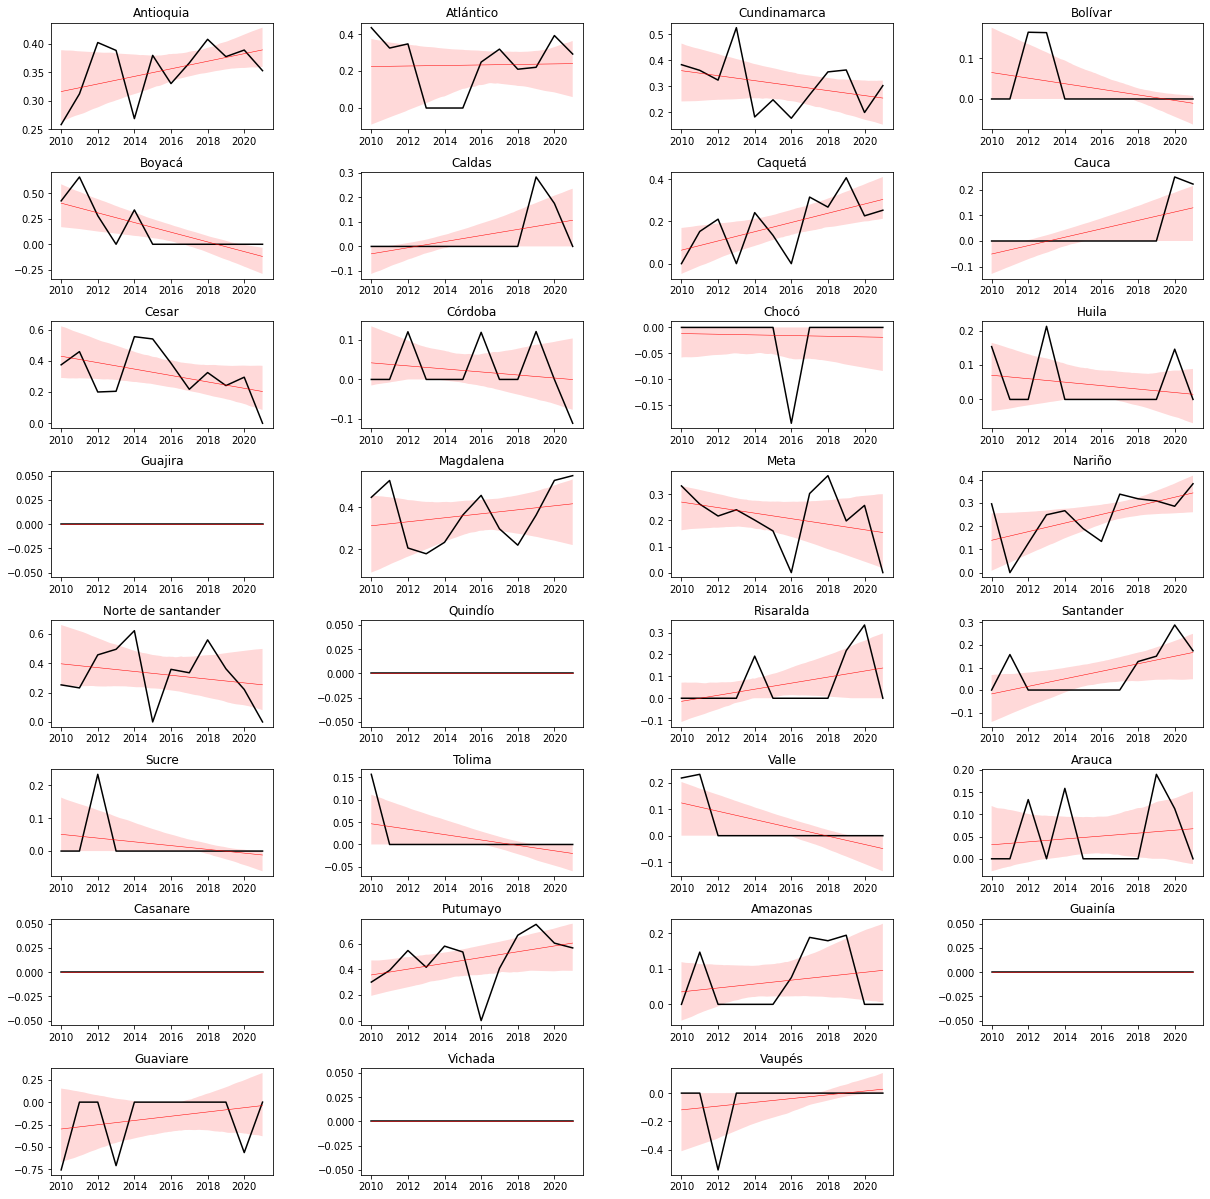

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

departamento = list(df["departamento"].unique())

plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(20,20))


for i in  range(1,32):
  plt.subplot(8,4,i)
  plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
  dept_list = ts.columns.tolist()[1:]
  plt.plot(ts['year'],ts[dept_list[i-1]], color='black')
  sns.regplot(x=ts['year'], y=ts[dept_list[i-1]], color='red', scatter_kws={'s':10}, label='Linear Model', scatter=False,
              line_kws={'linewidth':0.5, "alpha":1})
  plt.title(departamento[i-1], fontdict=None, loc="center", pad=None)
  plt.xlabel("")
  plt.ylabel("")
  plt.grid(False)



plt.show()



In [ ]:
# reshape from long to wide in pandas python
name_column = df
ts=im.pivot(index='cod_dpto', columns='year', values='moran_value')
ts=ts.reset_index().drop('cod_dpto', axis=1)
ts

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.258407,0.312405,0.402580,0.388733,0.268951,0.380016,0.330487,0.366760,0.408260,0.377792,0.389379,0.353140
1,0.435119,0.324609,0.347237,0.000000,0.000000,0.000000,0.248695,0.318791,0.210043,0.220495,0.392349,0.292212
2,0.382981,0.361203,0.323548,0.525497,0.181719,0.247936,0.176866,0.267125,0.355212,0.362594,0.198973,0.302451
3,0.000000,0.000000,0.163722,0.162728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.424969,0.659189,0.279984,0.000000,0.336475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.282663,0.175124,0.000000
6,0.000000,0.152508,0.210578,0.000000,0.241730,0.133929,0.000000,0.315266,0.267752,0.406883,0.226404,0.253008
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249418,0.221804
8,0.374222,0.458699,0.200298,0.204846,0.554394,0.539775,0.384492,0.217639,0.324717,0.241236,0.294952,0.000000
9,0.000000,0.000000,0.120590,0.000000,0.000000,0.000000,0.119116,0.000000,0.000000,0.121089,0.000000,-0.110859


In [ ]:
from tslearn.utils import to_time_series
tsm = to_time_series(ts)
tsm

array([[ 0.25840742,  0.31240476,  0.4025798 ,  0.3887332 ,  0.26895078,
         0.38001559,  0.3304872 ,  0.36676017,  0.40826013,  0.37779161,
         0.38937851,  0.35314002],
       [ 0.43511878,  0.32460888,  0.34723677,  0.        ,  0.        ,
         0.        ,  0.24869483,  0.31879111,  0.21004294,  0.22049544,
         0.39234946,  0.29221179],
       [ 0.38298145,  0.36120331,  0.32354798,  0.52549748,  0.18171851,
         0.24793616,  0.17686638,  0.26712493,  0.35521179,  0.36259397,
         0.19897253,  0.30245129],
       [ 0.        ,  0.        ,  0.16372197,  0.16272833,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.4249687 ,  0.65918863,  0.27998447,  0.        ,  0.33647546,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

In [ ]:
modelo = TimeSeriesKMeans(n_clusters=4, metric="dtw") 
labels=modelo.fit(tsm)

In [ ]:
lay_pred = modelo.fit_predict(tsm)

In [ ]:
lay_pred

array([1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 2, 2])

In [ ]:
name_column = df
ts1=im.pivot(index='cod_dpto', columns='year', values='moran_value')
ts1=ts1.reset_index()
ts1["cluster"] = pd.DataFrame(lay_pred)
ts1[["cod_dpto", "cluster"]]
ts1 = ts1.set_index(['cod_dpto'])
ts1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,cluster
cod_dpto,,,,,,,,,,,,,
5,0.258407,0.312405,0.402580,0.388733,0.268951,0.380016,0.330487,0.366760,0.408260,0.377792,0.389379,0.353140,1
8,0.435119,0.324609,0.347237,0.000000,0.000000,0.000000,0.248695,0.318791,0.210043,0.220495,0.392349,0.292212,1
13,0.382981,0.361203,0.323548,0.525497,0.181719,0.247936,0.176866,0.267125,0.355212,0.362594,0.198973,0.302451,1
15,0.000000,0.000000,0.163722,0.162728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
17,0.424969,0.659189,0.279984,0.000000,0.336475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.282663,0.175124,0.000000,2
19,0.000000,0.152508,0.210578,0.000000,0.241730,0.133929,0.000000,0.315266,0.267752,0.406883,0.226404,0.253008,1
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249418,0.221804,2
23,0.374222,0.458699,0.200298,0.204846,0.554394,0.539775,0.384492,0.217639,0.324717,0.241236,0.294952,0.000000,1


In [ ]:
n= ts1[ts1["cluster"]==1]

In [ ]:
#Importar geometría - mapa de Colombia
shape_dpto = gp.read_file('/content/gdrive/MyDrive/Proyecto integrador/Shape_departamento/depto.shp')
data_types_dict = {"DPTO": int} 
shape_dpto = shape_dpto .astype(data_types_dict) 
shape_dpto=shape_dpto[shape_dpto["DPTO"] !=11]
shape_dpto=shape_dpto[shape_dpto["DPTO"] !=88]
shape_dpto = shape_dpto.set_index(['DPTO'])
shape_dpto.head()

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
DPTO,,,,,
5,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((754872.146 1445316.567, 755882.980 1..."
8,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((913511.163 1637374.172, 912870.293 1..."
13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((881889.901 1644370.282, 882454.535 1..."
15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((1206427.930 1268967.315, 1207191.680..."
17,CALDAS,7.558200e+09,603282.457,755819.988,"POLYGON ((931978.603 1127612.742, 933119.333 1..."


In [ ]:
dm = gp.GeoDataFrame(shape_dpto.join(ts1[["cluster"]]), crs=shape_Colf.crs).to_crs(epsg=3857)
dm

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,cluster
DPTO,,,,,,
5,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((-8494114.571 962828.139, -8493091.14...",1
8,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((-8334177.970 1159428.492, -8334824.2...",1
13,BOLIVAR,2.614189e+10,1309427.968,2.614189e+06,"POLYGON ((-8366339.118 1166489.976, -8365759.8...",1
15,BOYACA,2.335258e+10,1364539.911,2.335258e+06,"POLYGON ((-8038325.087 783947.552, -8037557.29...",2
17,CALDAS,7.558200e+09,603282.457,7.558200e+05,"POLYGON ((-8314629.714 641155.373, -8313483.11...",1
18,CAQUETA,9.018087e+10,1888506.901,9.018087e+06,"POLYGON ((-8314371.733 277833.908, -8313982.69...",2
19,CAUCA,2.974279e+10,1243388.952,2.974279e+06,"MULTIPOLYGON (((-8706125.882 331022.833, -8710...",1
20,CESAR,2.297310e+10,1080343.678,2.297310e+06,"POLYGON ((-8157369.580 1215498.249, -8157180.1...",2
23,CORDOBA,2.505949e+10,814093.372,2.505949e+06,"POLYGON ((-8439809.570 1053410.155, -8438651.0...",1


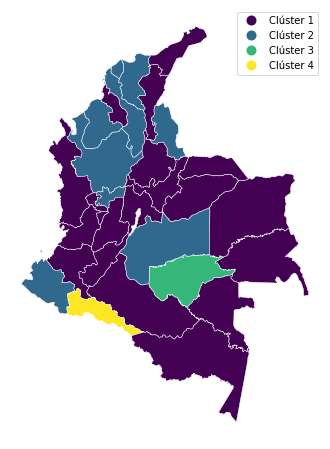

In [ ]:
labels= ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4']

#creando columna con variables categoricas a partir de 'CHOQUE'
#dm['cluster'] = pd.cut(
                        #x = dm['cluster'],
                        #bins = 4, 
                       # labels = labels
                        #)


#utilizando matplotlib nuevamente
fig , ax = plt.subplots(1, figsize = (14,8))

#definiendo caracteristicas del mapa (categorical = True)
dm.plot(
  column = 'cluster', 
  categorical = True, 
  legend = True,
  cmap = 'viridis',
  ax = ax,
  linewidth = 0.5,
  edgecolor = 'white',
  )



ax.axis('off')


fig.show()

# K-means para Moran local

In [ ]:
#Importar geometría - mapa de Colombia
shape_Col = gp.read_file('/content/gdrive/MyDrive/Proyecto integrador/Municipios_Colombia/MGN_MPIO_POLITICO.shp')
shape_Col.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


In [ ]:
years = pd.read_excel('/content/gdrive/MyDrive/Proyecto integrador/Tasa_Colombia.csv')

In [ ]:
year= list(range(2010, 2022))

dff3 = pd.DataFrame()

for i in  range(0,12):

   dff=df[df['year'] == year[i]]
   dm = gp.GeoDataFrame(shape_Col.join(dff[["tasa"]]), crs=shape_Colf.crs).to_crs(epsg=3857)
   dm['tasa'] = dm['tasa'].fillna(0) 

   w = weights.KNN.from_dataframe(dm, k=4)
   w.transform = "R"

   dm["Tasa_std"] = (dm["tasa"] - dm["tasa"].mean()) / dm["tasa"].std()
   dm["Tasa_lag_std"] = weights.spatial_lag.lag_spatial(
   w, dm["Tasa_std"])

   # índice local del Moran 
   lisa = esda.Moran_Local(dm["Tasa_std"], w)  

   df3 = pd.DataFrame()
   df3["Municipio"] = shape_Col['MPIO_CNMBR']
   df3["Moran_L"] = lisa.Is
   df3["cuadrante"] = lisa.q
   df3["pvalue"] = lisa.p_sim

   dff3= dff3.append(df3,ignore_index=True)


In [ ]:
dff3

,Municipio,Moran_L,cuadrante,pvalue
0,MEDELLÍN,NaN,3,0.001
1,ABEJORRAL,NaN,3,0.001
2,ABRIAQUÍ,NaN,3,0.001
3,ALEJANDRÍA,NaN,3,0.001
4,AMAGÁ,NaN,3,0.001
...,...,...,...,...
13447,YAVARATÉ,NaN,3,0.001
13448,SANTA ROSALÍA,NaN,3,0.001
13449,PUERTO CARREÑO,NaN,3,0.001
13450,LA PRIMAVERA,NaN,3,0.001


In [ ]:
# Reemplazamos valores no significativos por cero 
dff3['Moran_L'] = np.where((dff3["pvalue"] >0.05), 0 , dff3.Moran_L)
dff3

,Municipio,Moran_L,cuadrante,pvalue
0,MEDELLÍN,NaN,3,0.001
1,ABEJORRAL,NaN,3,0.001
2,ABRIAQUÍ,NaN,3,0.001
3,ALEJANDRÍA,NaN,3,0.001
4,AMAGÁ,NaN,3,0.001
...,...,...,...,...
13447,YAVARATÉ,NaN,3,0.001
13448,SANTA ROSALÍA,NaN,3,0.001
13449,PUERTO CARREÑO,NaN,3,0.001
13450,LA PRIMAVERA,NaN,3,0.001


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
x= dff3['Moran_L']
x=np.array(x).reshape(-1,1)

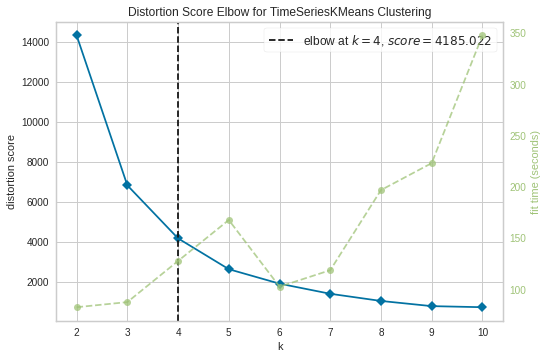

In [ ]:
# Determinamos k óptimo

modelo_1 = TimeSeriesKMeans(n_clusters=4, metric="dtw")
elb_visualizer = KElbowVisualizer(modelo_1, k=(2,11))
elb_visualizer.fit(x)
elb_visualizer.show()

In [ ]:
dff3

,Municipio,Moran_L,cuadrante,pvalue
0,MEDELLÍN,0.000000,1,0.161
1,ABEJORRAL,0.000000,3,0.489
2,ABRIAQUÍ,0.000000,3,0.126
3,ALEJANDRÍA,0.000000,3,0.132
4,AMAGÁ,0.000000,1,0.243
...,...,...,...,...
13423,YAVARATÉ,0.585962,3,0.004
13424,SANTA ROSALÍA,0.000000,3,0.456
13425,PUERTO CARREÑO,0.000000,1,0.128
13426,LA PRIMAVERA,0.000000,2,0.104


In [ ]:
# reshape from long to wide in pandas python
ts=im.pivot(index='Municipio', columns='year', values='moran_value')
ts=ts.reset_index().drop('cod_dpto', axis=1)
ts

In [ ]:
from tslearn.utils import to_time_series
tsm = to_time_series(ts)
tsm

In [ ]:
modelo = TimeSeriesKMeans(n_clusters=4, metric="dtw") 
labels=modelo.fit(tsm)

In [ ]:
lay_pred = modelo.fit_predict(tsm)

In [ ]:
name_column = df
ts1=im.pivot(index='cod_dpto', columns='year', values='moran_value')
ts1=ts1.reset_index()
ts1["cluster"] = pd.DataFrame(lay_pred)
ts1[["cod_dpto", "cluster"]]
ts1 = ts1.set_index(['cod_dpto'])
ts1

In [ ]:
#Importar geometría - mapa de Colombia
shape_Col = gp.read_file('/content/gdrive/MyDrive/Proyecto integrador/Municipios_Colombia/MGN_MPIO_POLITICO.shp')
data_types_dict = {"MPIO_CDPMP": int,
                   "DPTO_CCDGO": int} 
shape_Col = shape_Col .astype(data_types_dict) 
shape_Col = shape_Col.set_index(['MPIO_CDPMP'])
shape_Col.head()

,DPTO_CCDGO,MPIO_CCDGO,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
MPIO_CDPMP,,,,,,,,,,,,
5001,5,001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
5002,5,002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
5004,5,004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
5021,5,021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
5030,5,030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


In [ ]:
dm = gp.GeoDataFrame(shape_Col.join(valor_medio[["tasa_media"]]), crs=shape_Col.crs).to_crs(epsg=3857)
dm['tasa_media'] = dm['tasa_media'].fillna(0)       
dm.info()

In [ ]:
labels= ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4']

#creando columna con variables categoricas a partir de 'CHOQUE'
#dm['cluster'] = pd.cut(
                        #x = dm['cluster'],
                        #bins = 4, 
                       # labels = labels
                        #)


#utilizando matplotlib nuevamente
fig , ax = plt.subplots(1, figsize = (14,8))

#definiendo caracteristicas del mapa (categorical = True)
dm.plot(
  column = 'cluster', 
  categorical = True, 
  legend = True,
  cmap = 'viridis',
  ax = ax,
  linewidth = 0.5,
  edgecolor = 'white',
  )



ax.axis('off')


fig.show()